Flight Price Prediction Problem Statement: Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
Size of training set: 10683 records
Size of test set: 2671 records
FEATURES: Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Route: The route taken by the flight to reach the destination.
Dep_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.
Additional_Info: Additional information about the flight
Price: The price of the ticket

In [93]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from scipy import stats
import feature_engine
import webbrowser
%matplotlib inline

In [95]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [96]:
train_set = pd.read_excel("Data_Train.xlsx")
test_set = pd.read_excel("Test_set.xlsx")

In [97]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [98]:
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [99]:
train_set.shape

(10683, 11)

In [100]:
test_set.shape

(2671, 10)

In [101]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [102]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [103]:
train_set.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [104]:
train_set.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [105]:
test_set.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [106]:
train_set.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [107]:
test_set.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [108]:
train_set.corr()

,Price
Price,1.0


In [109]:
test_set.corr()

""


In [110]:
df = train_set.append(test_set)

In [111]:
df.shape

(13354, 11)

In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [113]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [114]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2219,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,11:30,19:00,7h 30m,1 stop,In-flight meal not included,NaN
2277,IndiGo,6/05/2019,Banglore,Delhi,BLR → DEL,16:55,19:55,3h,non-stop,No info,NaN
2151,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:00,8h 25m,1 stop,No info,NaN
3130,IndiGo,9/03/2019,Delhi,Cochin,DEL → BOM → COK,06:40,21:00,14h 20m,1 stop,No info,12351.0
2162,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,20:55,04:25 22 May,7h 30m,1 stop,In-flight meal not included,12898.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


I n the above cell only 1 column with integer datatype

In [116]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


With he help of describe we can see the details of our numeric datatype.

In [117]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In the above column that have two missing data.

<AxesSubplot:>

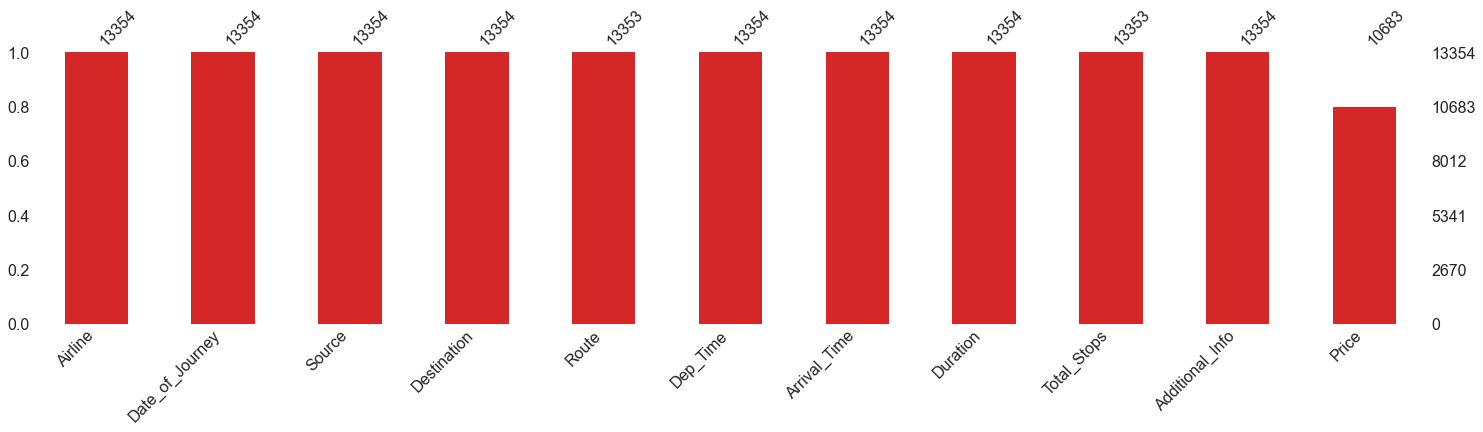

In [118]:
import missingno
missingno.bar(df, figsize=(25,5), color="tab:red")

We are able to decipt the missing values in the datset

In [119]:
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (13354, 11)
Rows and Columns after dropping duplicates: (13108, 11)


In the above cell we remove all the duplicates values rows

In [120]:
print(f"Rows and Columns before dropping null values :",df.shape)
df.dropna(inplace=True)
print(f"Rows and Columns after dropping null values:",df.shape)

Rows and Columns before dropping null values : (13108, 11)
Rows and Columns after dropping null values: (10462, 11)


In the above cell we remove all the null values rows.

In [121]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In the above cell we have no missing dat present in our dataset.

In [122]:
df.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


In the above cell all the columns have uniques values.

In [123]:
def date_bifurcation(df1):
    df1=df1.copy()
    df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
    df1['Year_of_Journey']=df1['Date_of_Journey'].dt.year
    df1['Month_of_Journey']=df1['Date_of_Journey'].dt.month
    df1['Day_of_Journey']=df1['Date_of_Journey'].dt.day
    df1=df1.drop(['Route','Date_of_Journey','Duration'],axis=1)
    return df1

df = date_bifurcation(df)
print(f"Rows and columns:",df.shape)
df.head()

Rows and columns: (10462, 11)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662.0,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882.0,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218.0,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302.0,2019,1,3


I have created a function that are basically separate the data column.

In [124]:
def time_bifurcation(df1):
    df1['Departure_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
    df1['Departure_minute']=pd.to_datetime(df1['Dep_Time']).dt.minute
    df1=df1.drop(['Dep_Time'],axis=1)
    df1['Arrival_hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour
    df1['Arrival_minute']=pd.to_datetime(df1['Arrival_Time']).dt.minute
    df1=df1.drop(['Arrival_Time'],axis=1)
    return df1

df = time_bifurcation(df)
print(f"Rows and columns:",df.shape)
df.head()

Rows and columns: (10462, 13)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,2019,1,3,16,50,21,35


In the above cell i have created another function which have deals with time

In [125]:
df.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Source,5
Destination,6
Total_Stops,5
Additional_Info,10
Price,1870
Year_of_Journey,1
Month_of_Journey,7
Day_of_Journey,9
Departure_hour,24


Taking all the column in our datadrame i. our original datset

In [126]:
df.drop("Year_of_Journey",axis=1,inplace=True)

VISUlization

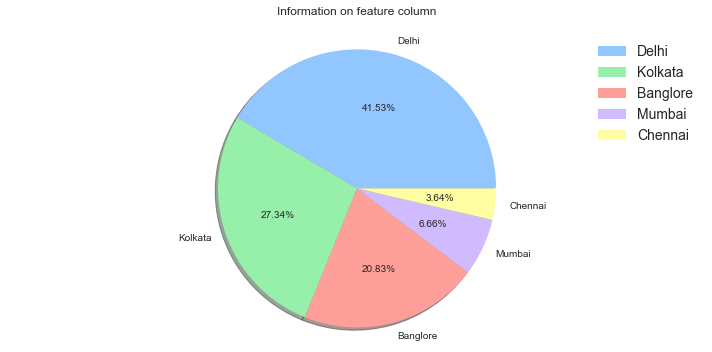

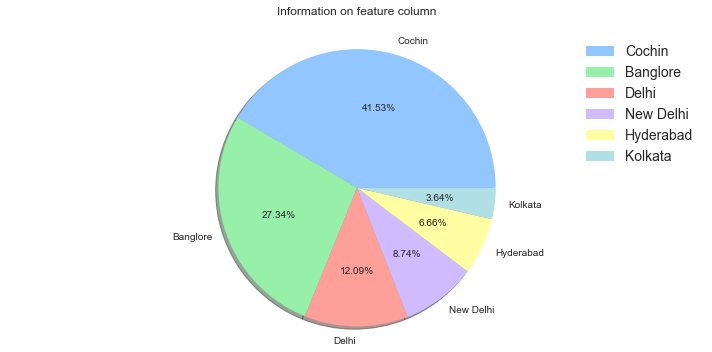

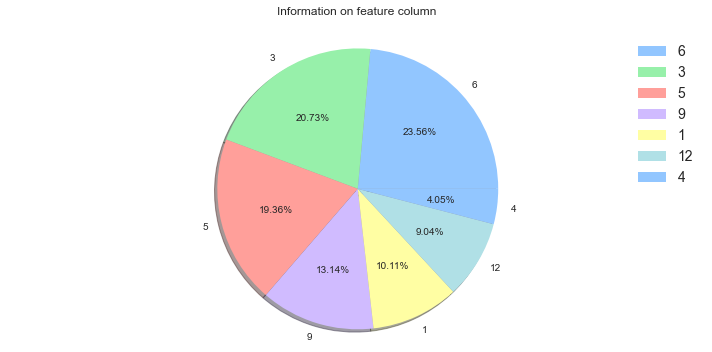

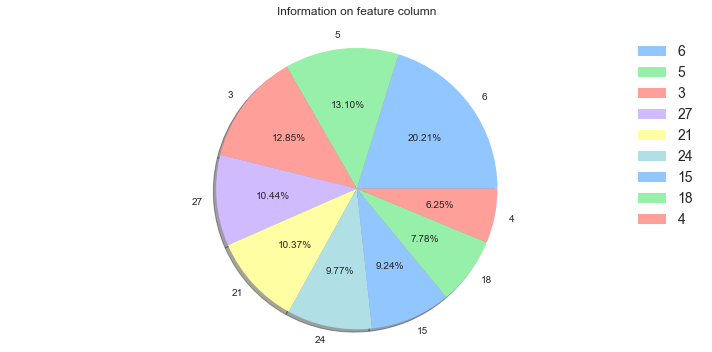

In [127]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(),labels=x.value_counts().index,shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.title('Information on feature column\n')
    plt.tight_layout()
    return plt.show()
generate_pie(df['Source'])
generate_pie(df['Destination'])
generate_pie(df['Month_of_Journey'])
generate_pie(df['Day_of_Journey'])

1. In the source column we have the highest number of rows covered by Delhi and lowest number covered by chennai.
2.In the destination column we have the highest numbers of rows covered by cochin lowest number covered by kolkotta.
3.We see that our datset that most of the journey made by people were in the month of june least  in the month of april.
4.we also see that in our data set that most of the journey made by people were on dates 6,5 and the least travelling dates were for 4,18

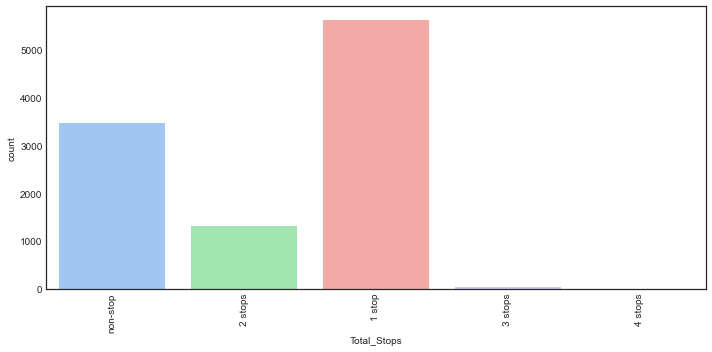

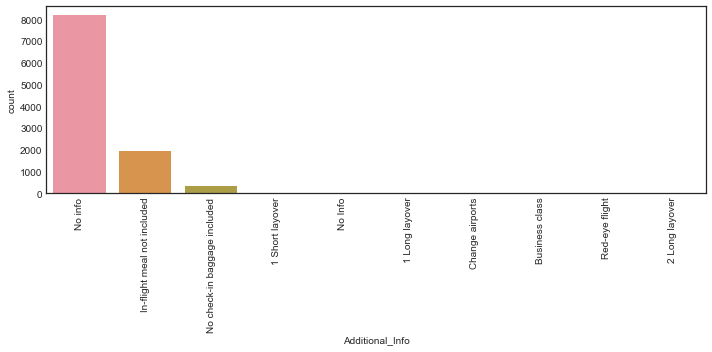

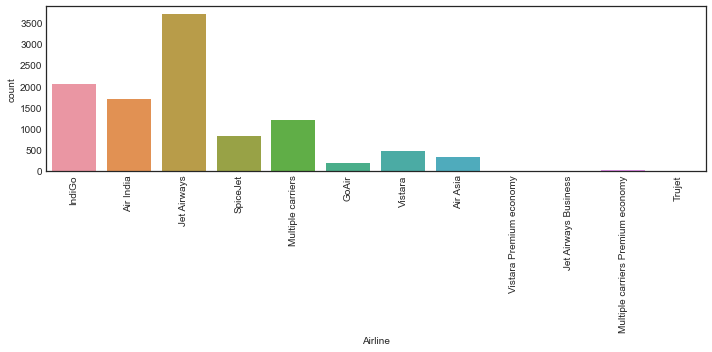

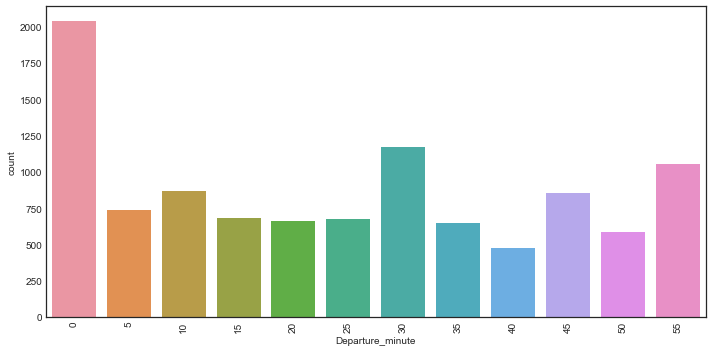

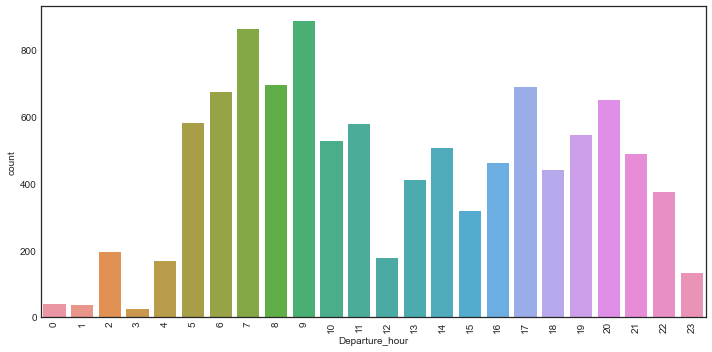

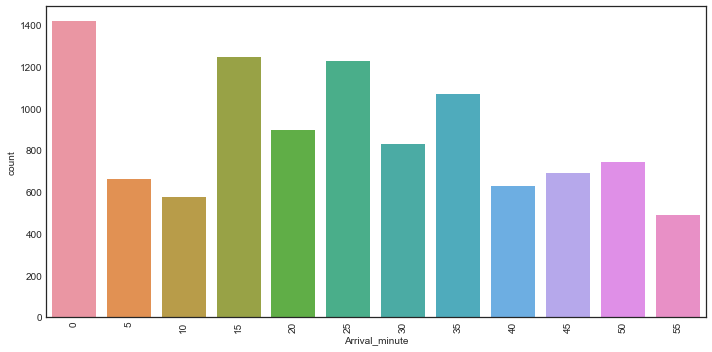

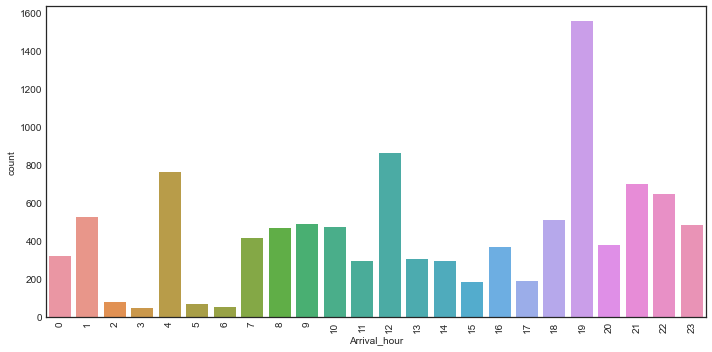

In [128]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

generate_countplot(df['Total_Stops'])
generate_countplot(df['Additional_Info'])
generate_countplot(df['Airline'])
generate_countplot(df['Departure_minute'])
generate_countplot(df['Departure_hour'])
generate_countplot(df['Arrival_minute'])
generate_countplot(df['Arrival_hour'])

1.In the total stops columns we see highest count of rows covered by 1 stop flights. 2. In additinal info columns most number of rows are covered by no info values. 3.The airline column shows that highest numbers of flight details are present in our dataset. 4.The departure minutes column gives us the indication that most number of flights get scheduled at 0 min. 5.The departure hours column gives us the indication that most number of flights get scheduled at 7 and 9 hour morning time. 6.The arrival min column gives us the indication that mostly flight get scheduled at 0 minutes for arrival. 7.The arrival hour column gives us the indication that mostly flight get scheduled at 19 hour in the evening.

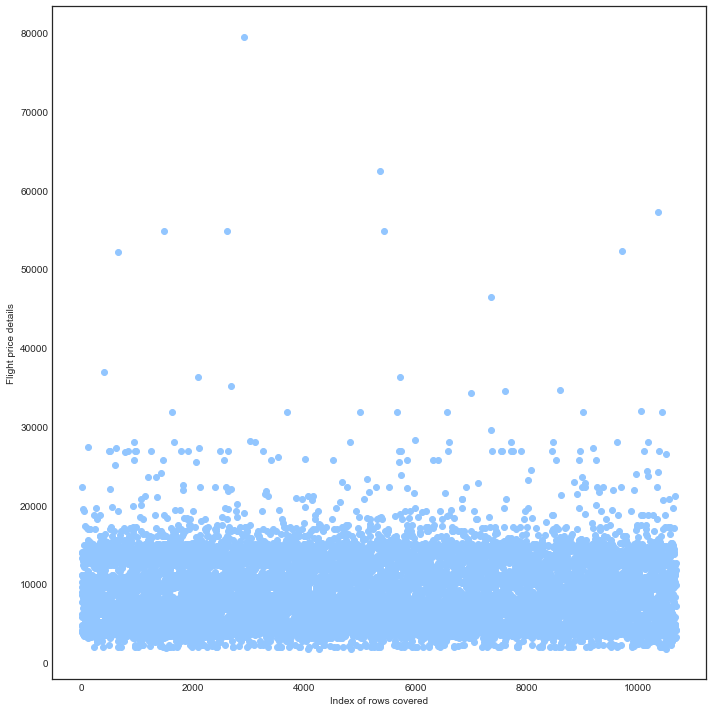

In [129]:
plt.style.use('fast')
plt.figure(figsize=(10,10))
plt.scatter(df.index,df['Price'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

we are able to see that mostly of the flight price values are accumlated between 0-20000 .

<AxesSubplot:xlabel='Source', ylabel='Price'>

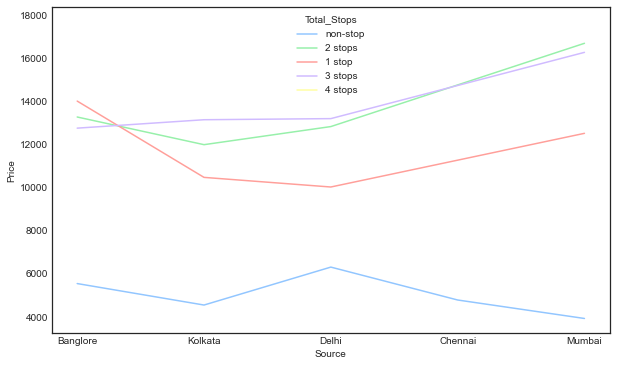

In [130]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Source',y='Price',hue='Total_Stops',data=df,ci=None)

we see that non stop flights are lower price irrespective of the source as compared to others 

<AxesSubplot:xlabel='Destination', ylabel='Price'>

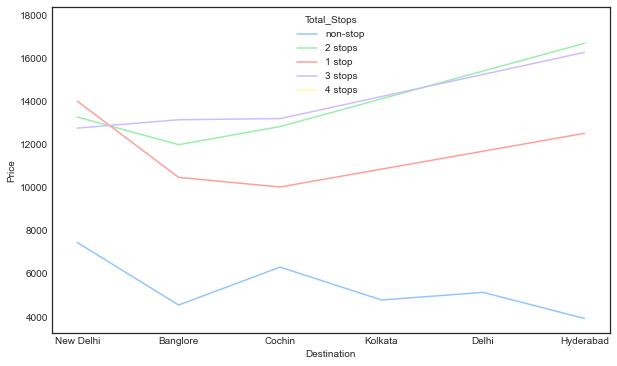

In [131]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination',y='Price',hue='Total_Stops',data=df,ci=None)

we see that non stop flights are lower price

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

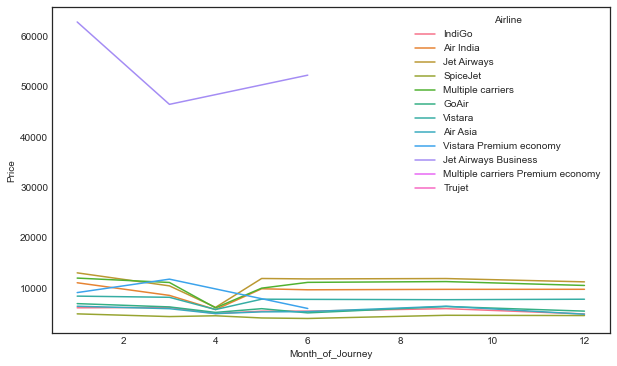

In [132]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_of_Journey',y='Price',hue='Airline',data=df,ci=None)

we see that jetairways business class has the highest price rise than the rest possibly becausethe remaining offer the economy class data

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

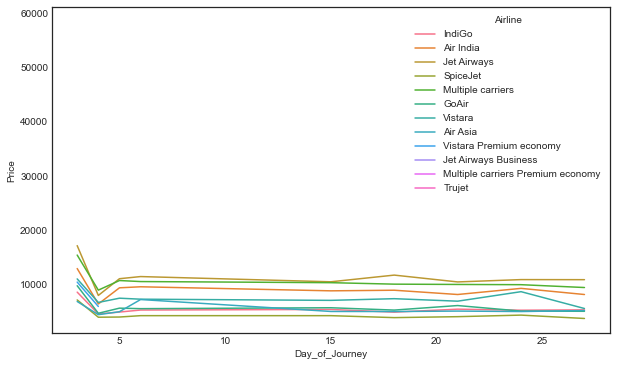

In [133]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Day_of_Journey',y='Price',hue='Airline',data=df,ci=None)

we see that all the airlines have high price between 1-5 days of a month.

<AxesSubplot:xlabel='Departure_minute', ylabel='Price'>

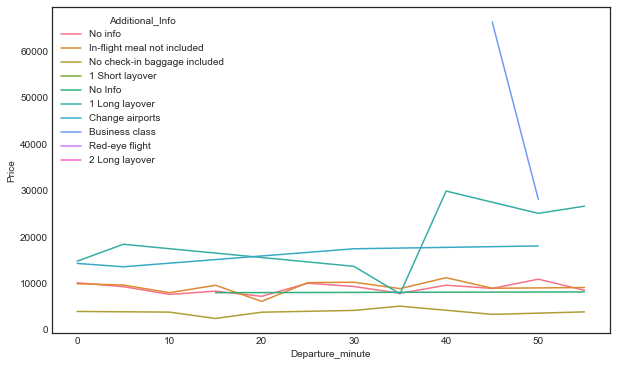

In [134]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Departure_minute',y='Price',hue='Additional_Info',data=df,ci=None)

we see that business class again has high price

<AxesSubplot:xlabel='Departure_hour', ylabel='Price'>

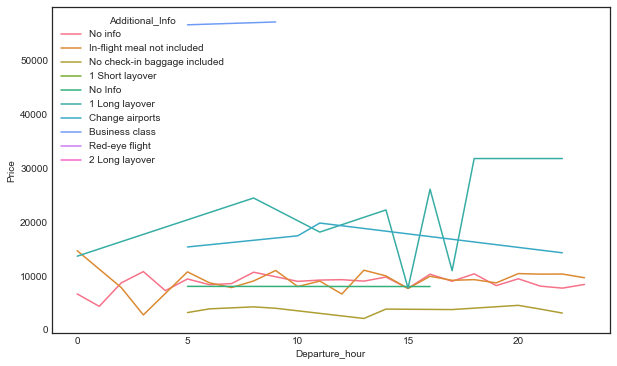

In [135]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Departure_hour',y='Price',hue='Additional_Info',data=df,ci=None)

we see that business class has high price and its departure hour is between 5-19 .

<AxesSubplot:xlabel='Arrival_minute', ylabel='Price'>

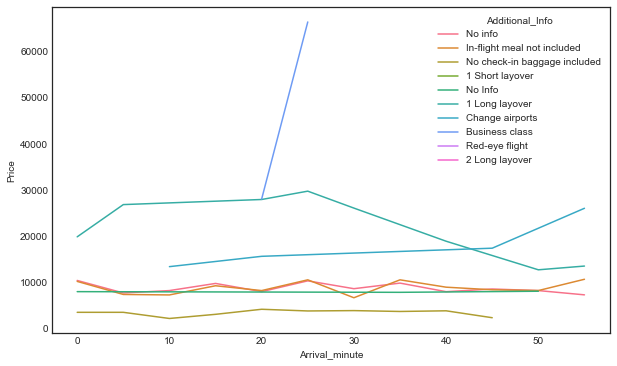

In [136]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Arrival_minute',y='Price',hue='Additional_Info',data=df,ci=None)

we see that business class again has a exponential price rise 

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

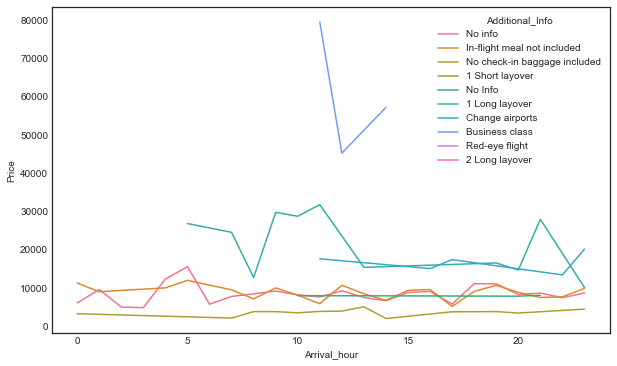

In [137]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Arrival_hour',y='Price',hue='Additional_Info',data=df,ci=None)

I n the above line plot we can see that price for no check in bag is least compared to the business class being highest and the arrival hour for business class is spread only between 10-15 minutes.

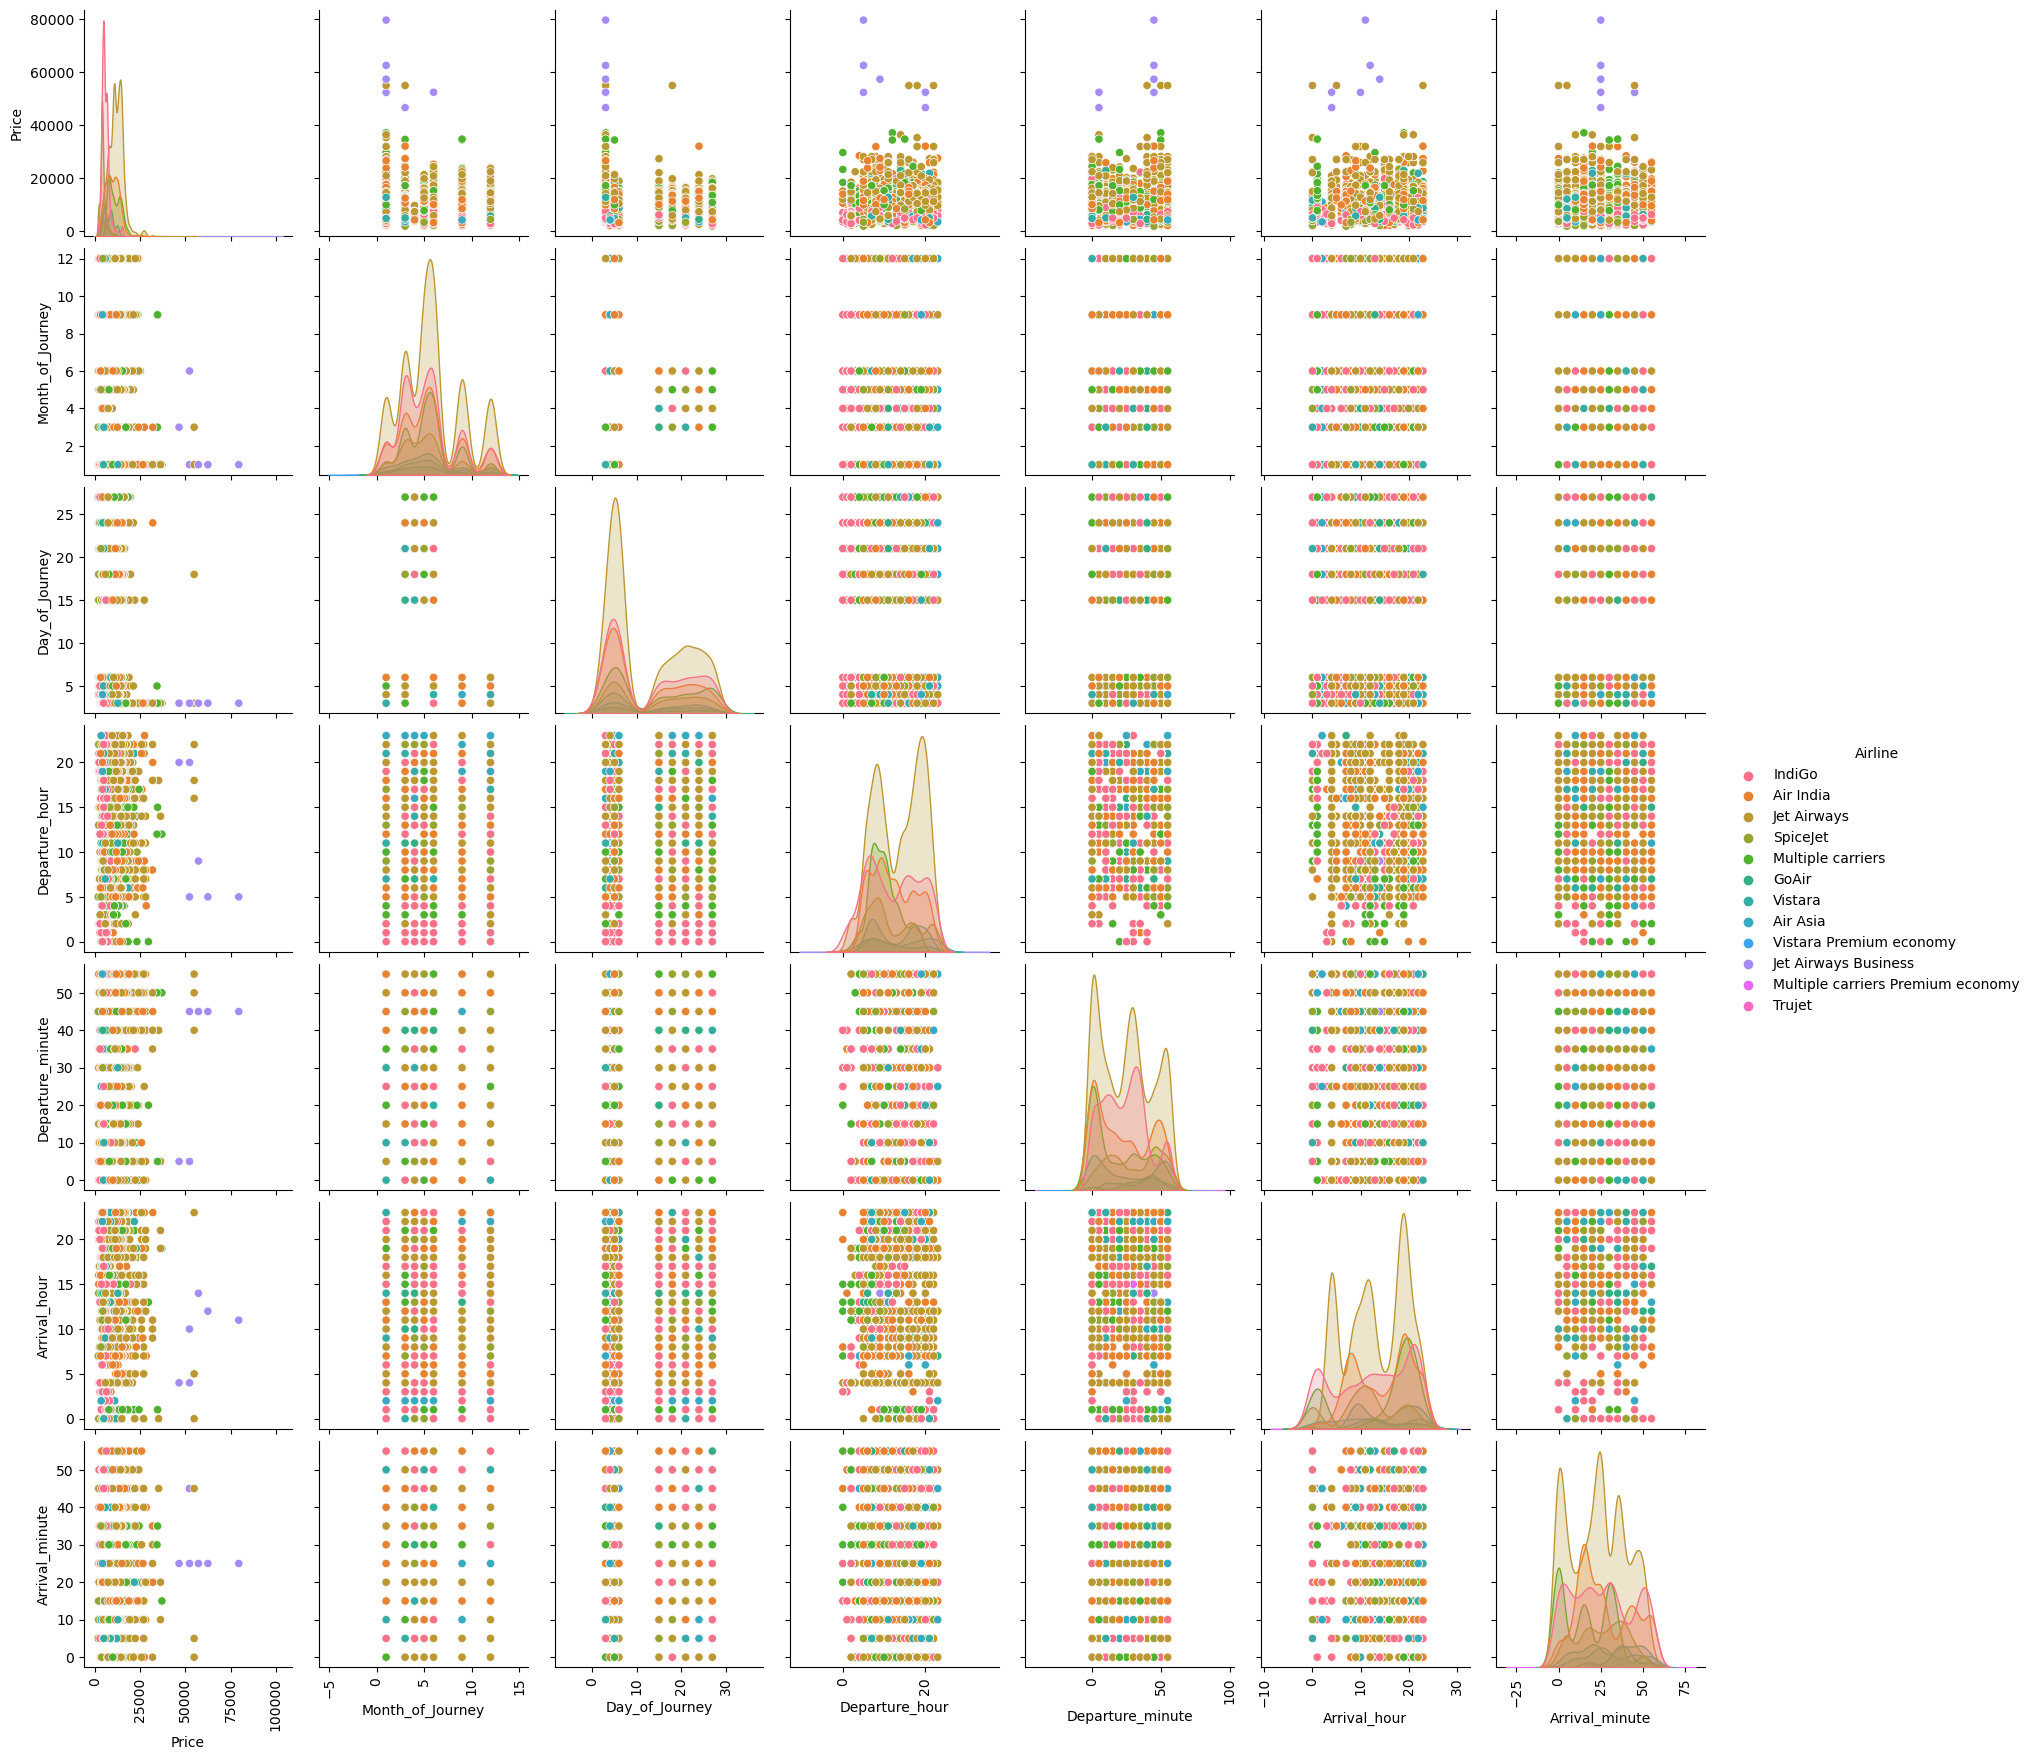

In [138]:
plt.style.use('default')
g = sns.pairplot(df,hue='Airline', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x",labelrotation=90)
plt.show()    

The above pairplot gives us an indication on the numerical data considering the different airlines present in our datset

ENCODING THE CATEGORICAL OBJECT DATATYPE COLUMN

In [139]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [140]:
oe = OrdinalEncoder()
def ordinal_encoder(df,col):
    df[col]=oe.fit_transform(df[col])
    return df

df=ordinal_encoder(df,['Airline','Source','Destination','Total_Stops','Additional_Info'])

I am using ordinal encoder method for encoding my categorical features.

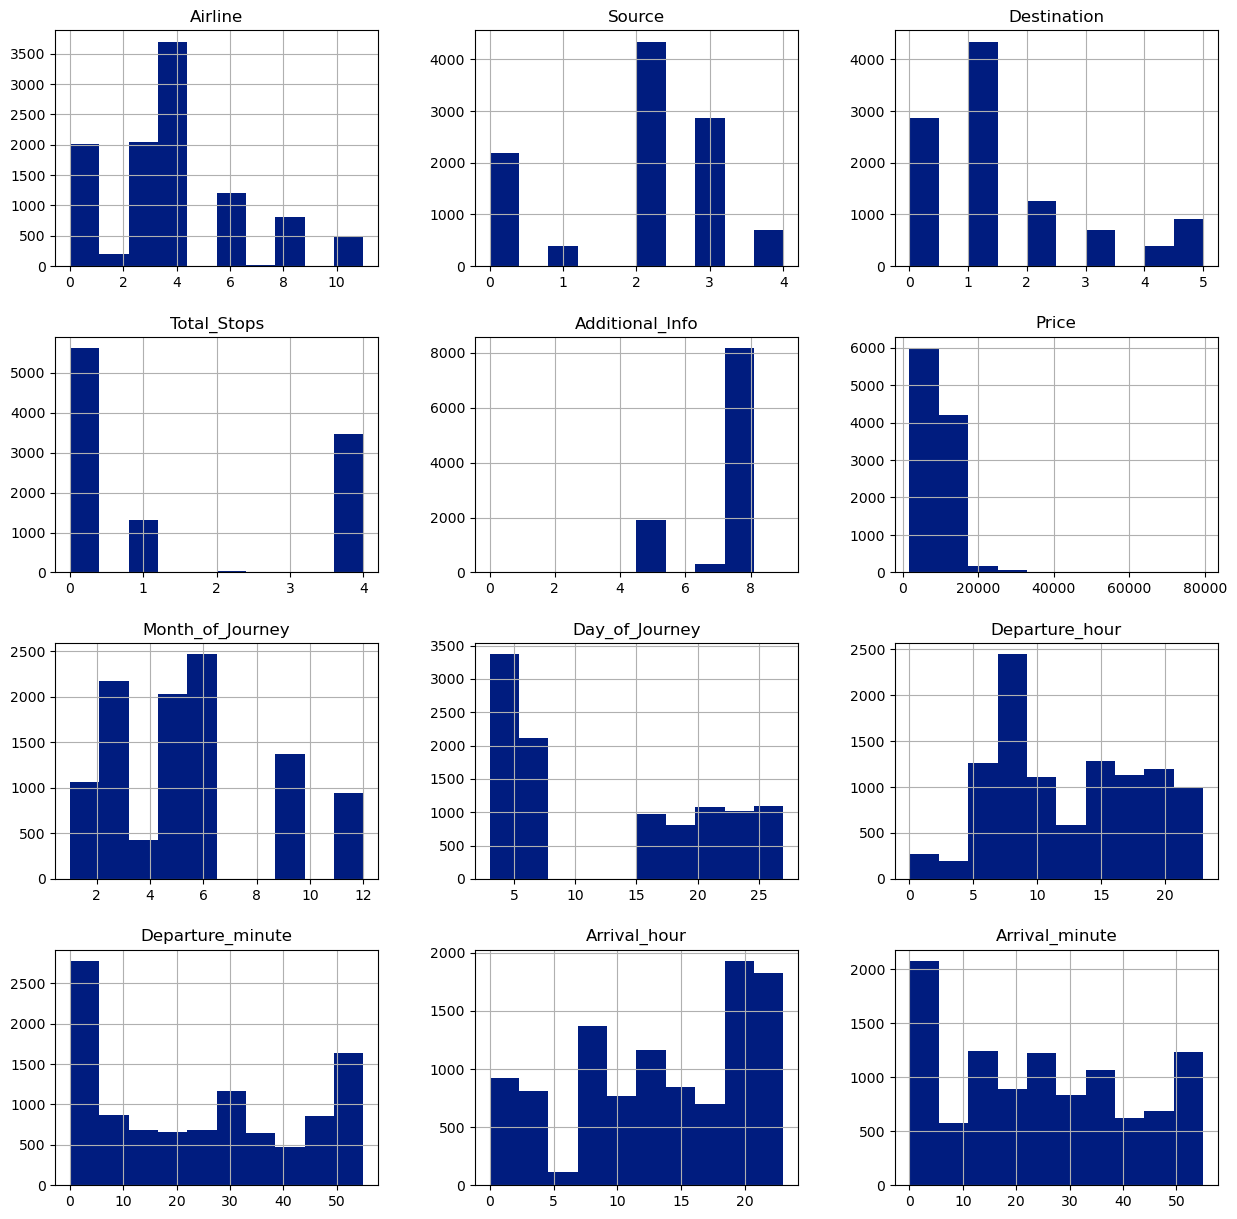

In [141]:
plt.style.use('seaborn-dark-palette')
df.hist(figsize=(15,15))
plt.show()

with the help of above histogram we are able to see the data distribution in our columns after encoding technique was applied on all categorical columns.

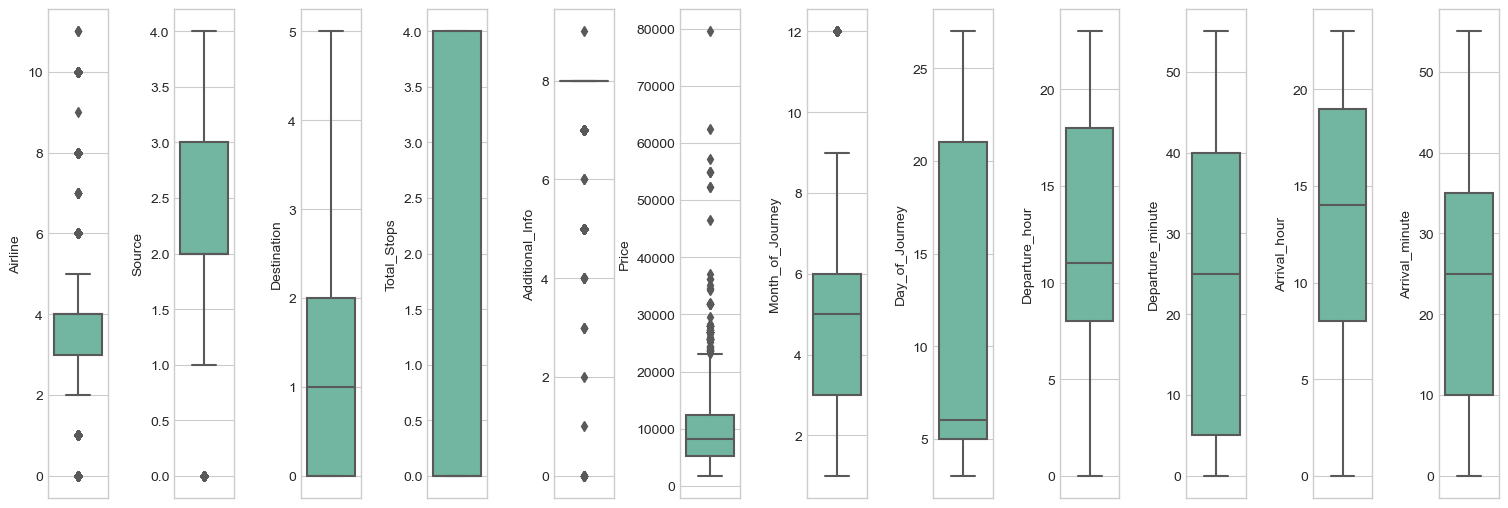

In [142]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=12, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using boxplot we are able to notice the outliers present in our datset

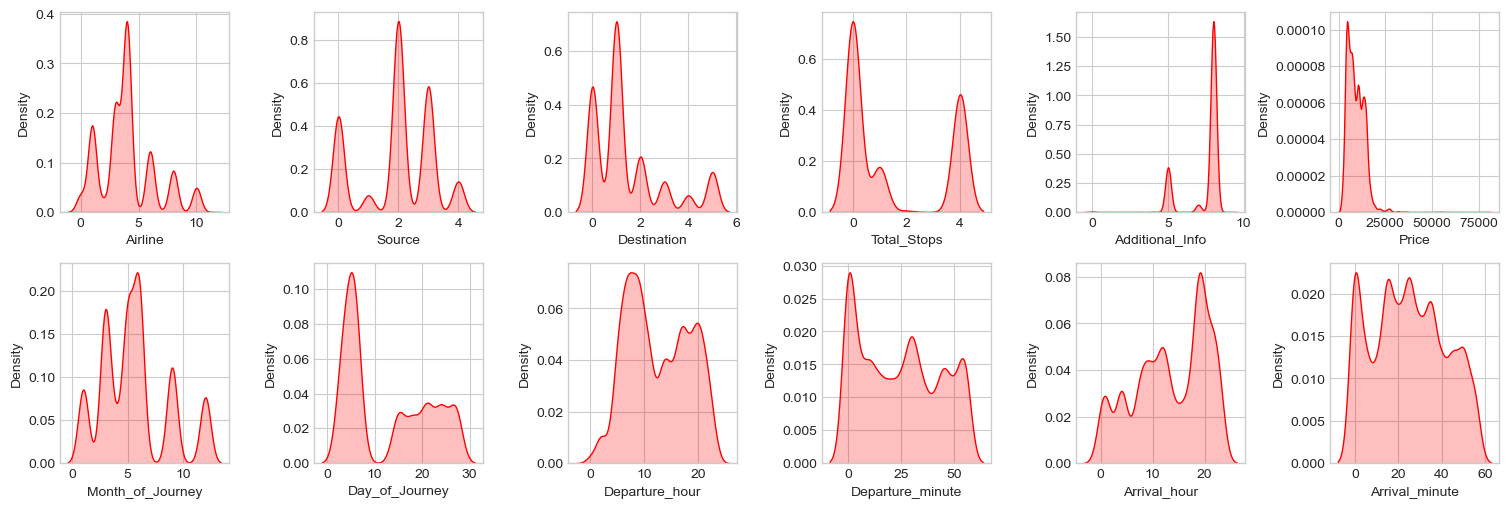

In [143]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

JUST LIKE IN THE CASE OF OUTLIERS WITH HELP OF ABOVE DISTRIBUTION PLOTS DATASET GIVES US AN INDICATION OF PRESENCE OF SKEWNESS IN OUR COLUMN HOWEVER FOR CATEGORICAL DATA COLUMNS 

CORRELATION USING HEATMAP

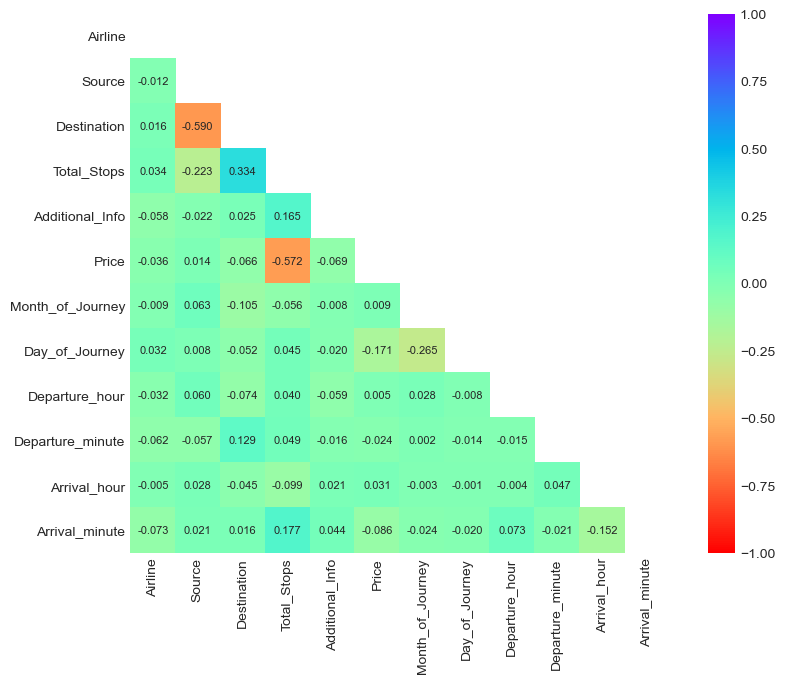

In [144]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

With the help of heatmap we are able to notice the correlation details between our label and feature.

CORRELATION BAR PLOT COMPARING FEATURES WITH OUR LABEL

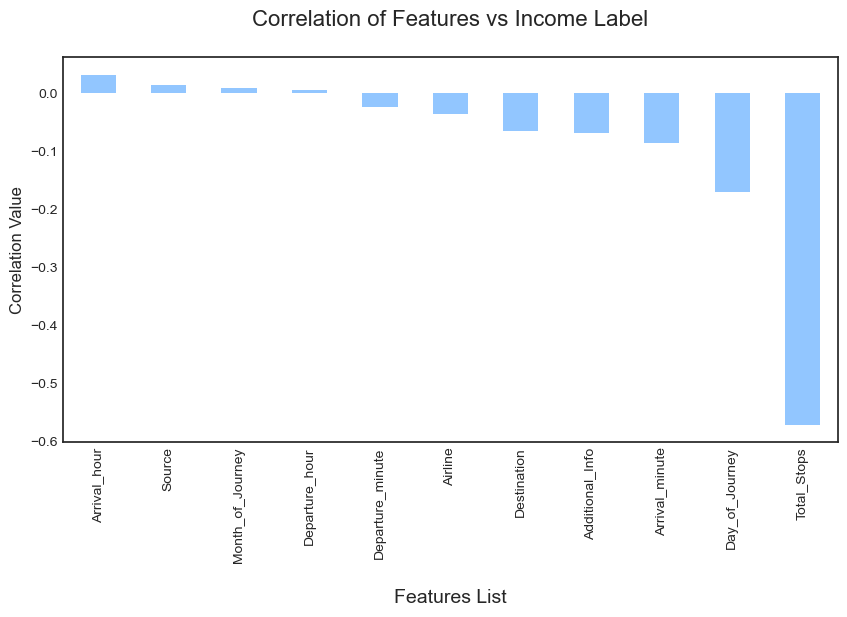

In [145]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above bar plot for veiwing the correlation information between our features and label we cn see that only columns arrival hour,source month of journey and departure hours are positively correlated with our target and all are negatively correlated indicating that as the number of total stops in an itinerary increases the price of that particular flight increases or vice versa.

SPLITTING THE DATASET INTO 2 VARIABLES

In [146]:
X = df.drop('Price', axis=1)
Y = df['Price']

Here X represents the all feature column and Y represents a regression target label column.

Feature scaling

In [147]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,-0.414916,-1.646877,2.404213,1.392916,0.497963,-0.846221,1.293326,1.662578,-0.234123,-1.807045,-0.888367
1,-1.260756,0.882057,-0.972012,-0.254274,0.497963,-1.513956,-0.867922,-1.305841,1.360364,-0.056554,-0.586611
2,0.008004,0.039079,-0.296767,-0.254274,0.497963,1.156984,-0.754172,-0.607390,0.031625,-1.369422,0.016902
3,-0.414916,0.882057,-0.972012,-0.803337,0.497963,2.158586,-0.867922,0.964126,-1.031367,1.402189,0.318658
4,-0.414916,-1.646877,2.404213,-0.803337,0.497963,-1.513956,-1.095422,0.614900,1.360364,1.110440,0.620415


I am using standardscaler method to normalize my feature value and ensure that my regression model does not have any kind of bianess towards a particular column value

FINDING THE BEST RANDOM STATE

In [148]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test,pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 0.4194390126695826 on Random State 754


WE FOUNG 754 FOR OUR RANDOM STSTE VALUE IN RANGE BETWEEN 1-1000.

In [149]:
from sklearn.ensemble import RandomForestRegressor

FEATURE IMPORTANCE BAR GRAPH

,Importance
Features,
Total_Stops,0.426
Airline,0.143
Day_of_Journey,0.125
Month_of_Journey,0.071
Additional_Info,0.066
Arrival_hour,0.042
Departure_hour,0.040
Departure_minute,0.031
Arrival_minute,0.025


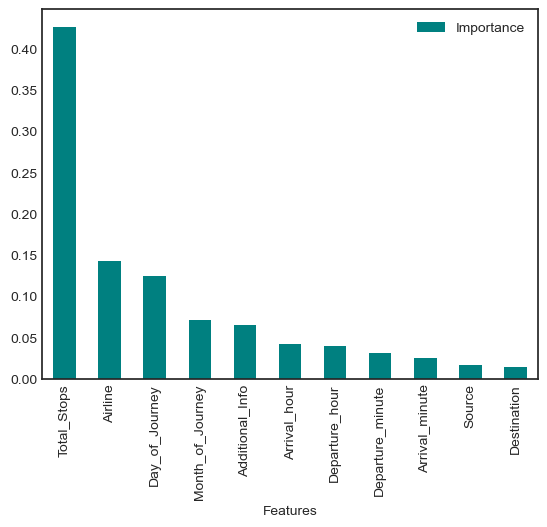

In [150]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Here with the help of randomforestregressor we are able to list down the importance or priority given to a column as per its involvement in predicting our label

MACHINE LEARNING MODEL FOR REGRESSION WITH EVALUTION METRICS

In [151]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=754)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test,pred,squared=False)
    print("RMSE Score is :",rmse)
    
    r2 = r2_score(Y_test,pred,multioutput='variance_weighted')*100
    print("R2 score is:",r2)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = r2 - cv_score
    print("R2 score - Cross Validation Score is",result)

I have built a regression function that split the training and testing features and labels

In [152]:
#Linear Regression

model=LinearRegression()
reg(model,X,Y)

RMSE Score is : 3253.245213499442
R2 score is: 41.94390126695826
Cross Validation Score: 37.02843675760597
R2 score - Cross Validation Score is 4.91546450935229


In [153]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is : 3252.094541183132
R2 score is: 41.98496286977021
Cross Validation Score: 37.02502409742235
R2 score - Cross Validation Score is 4.959938772347854


In [154]:
#Lasso Regression

model=Lasso(alpha=1e-2,normalize=True,max_iter=1e5)
reg(model,X,Y)

RMSE Score is : 3253.0465046164677
R2 score is: 41.950993207130836
Cross Validation Score: 37.028435460972034
R2 score - Cross Validation Score is 4.922557746158802


In [155]:
#support vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is : 4217.930182317322
R2 score is: 2.408268550434034
Cross Validation Score: 2.1075676061836135
R2 score - Cross Validation Score is 0.3007009442504205


In [156]:
#DecisionTreeRegressor


model=DecisionTreeRegressor(criterion="poisson",random_state=111)
reg(model,X,Y)

RMSE Score is : 2964.6849520752053
R2 score is: 51.786201586078185
Cross Validation Score: 58.578837682797136
R2 score - Cross Validation Score is -6.792636096718951


In [157]:
#RandomForestRegressor

model=RandomForestRegressor(max_depth=2,max_features='sqrt')
reg(model,X,Y)

RMSE Score is : 3018.051983472369
R2 score is: 50.03479409828163
Cross Validation Score: 44.487348085926456
R2 score - Cross Validation Score is 5.547446012355174


In [158]:
#KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')
reg(model,X,Y)

RMSE Score is : 2212.673172463204
R2 score is: 73.14353855755616
Cross Validation Score: 69.95653654336583
R2 score - Cross Validation Score is 3.187002014190327


In [159]:
#GradientBoostingRegressor

model=GradientBoostingRegressor(loss='quantile',n_estimators=200,max_depth=5)
reg(model,X,Y)

RMSE Score is : 2542.5814191265035
R2 score is: 64.53793777808849
Cross Validation Score: 67.10023499034887
R2 score - Cross Validation Score is -2.5622972122603755


In [160]:
#AdaBoostRegressor

model=AdaBoostRegressor(n_estimators=300,learning_rate=1.05,random_state=42)
reg(model,X,Y)

RMSE Score is : 3066.187569306349
R2 score is: 48.42827158308161
Cross Validation Score: 32.32037483858014
R2 score - Cross Validation Score is 16.107896744501467


In [161]:
from sklearn.ensemble import ExtraTreesRegressor

In [162]:
#ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=200,max_features='sqrt',n_jobs=6)
reg(model,X,Y)

RMSE Score is : 1408.7118260770592
R2 score is: 89.11424462288805
Cross Validation Score: 86.92190977057945
R2 score - Cross Validation Score is 2.192334852308605


In [163]:
from xgboost import XGBRegressor

In [164]:
#XGBRegressor

model=XGBRegressor()
reg(model,X,Y)

RMSE Score is : 1408.8013601931516
R2 score is: 89.11286083744568
Cross Validation Score: 89.31337098569448
R2 score - Cross Validation Score is -0.20051014824879587


Hyper parameter tuning on the best regression ML model

In [165]:
fmod_param = {'booster' : ['gbtree','dart','gblinear'],
             'importance_type' : ['gain','split'],
             'n_estimators' : [100,200,500],
             'eta' : [0.001,0.01,0.1]
             }

 I choose xgb regressor for my best model

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
GSCV = GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [168]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

we are training our data model by providing all the parameters we deem fit so it can go through all the premutation 
and combination to identify the best value

In [169]:
GSCV.best_params_

{'booster': 'dart', 'eta': 0.1, 'importance_type': 'gain', 'n_estimators': 500}

In the above cell we have received the entire list of parameters after training our model by giving if different inputs and choosing the best one out of them

In [170]:
Final_Model = XGBRegressor(booster='dart',eta=0.1,importance_type='gain',n_estimators=500)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test,fmod_pred)*100
print("R2 score for the Best Model is:",fmod_r2)

R2 score for the Best Model is: 87.55683244091347


We have to build our model by using hyper parameters method.

In [171]:
filename = "FinalModel_E07.pkl"
joblib.dump(Final_Model,filename)

['FinalModel_E07.pkl']

Saving the final model using joblib method

Loading the datset

In [172]:
df1_test = pd.read_excel("Test_set.xlsx")

In [173]:
df1_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


I have imported all the testing datset.

In [174]:
df1_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Taking a look at missing value information in our testing dataset . luckily we dont have any null values present in the dataset

In [175]:
print(f"Rows and Columns before dropping duplicates:",df1_test.shape)
df1_test.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df1_test.shape)

Rows and Columns before dropping duplicates: (2671, 10)
Rows and Columns after dropping duplicates: (2645, 10)


We are removing all the duplicates rows

In [176]:
df1_test = date_birfurcation(df1_test)
print(f"Rows and Columns:", df1_test.shape)
df1_test.head()

Rows and Columns: (2645, 10)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,non-stop,No info,2019,6,24


Using the date_bifurcation function we are able separate the date information and dropping all the unnecessary columns as well.

In [177]:
df1_test = time_bifurcation(df1_test)
print(f"Rows and Columns:", df1_test.shape)
df1_test.head()

Rows and Columns: (2645, 12)


,Airline,Source,Destination,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45


Using the time _bifurcation we are separating time related values and creating additional columns for them

In [178]:
df1_test.drop("Year_of_Journey", axis=1, inplace=True)
df1_test=ordinal_encoder(df1_test, ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

Now we are applying ordinal encoder technique since we have all our feature columns with an order category and its become easier
to convert than the usage of one hot encoding method

In [179]:
df1_test = pd.DataFrame(scaler.fit_transform(df1_test), columns=df1_test.columns)

with the usage of standardard we have transformed all our feature values in a normalized format to avoid biases in our regression model

In [180]:
predited_values = Final_Model.predict(df1_test)
data = pd.DataFrame(predited_values, columns=['Predicted Flight Prices'])
data

,Predicted Flight Prices
0,14110.669922
1,4543.466309
2,12488.573242
3,10740.702148
4,3604.915771
...,...
2640,10002.468750
2641,4299.228027
2642,16538.347656
2643,12429.273438


Here we are using our best model algorithm to predict the target label and show it in dataframe.